In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py 
import plotly.tools as tls 
import cufflinks as cf 
%matplotlib inline

C:\Users\ambik\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df2=pd.read_excel("S:\Data_Train.xlsx")
df1=pd.read_excel("S:\Test_set.xlsx")

In [3]:
df=df2.append(df1,ignore_index=True)

C:\Users\ambik\AppData\Local\Temp\ipykernel_14888\3162816075.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [5]:
df.shape

(13354, 11)

In [6]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [8]:
df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
13349     6
13350    27
13351     6
13352     6
13353    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [9]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.4+ MB


In [11]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [12]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.2+ MB


In [14]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [15]:
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
13349    20:25
13350    16:55
13351    04:25
13352    19:15
13353    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [16]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [17]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [18]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [19]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_hour     13354 non-null  int32  
 13  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.2+ MB


In [21]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_min']=df['Dep_Time'].str.split(':').str[1]
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [23]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [24]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [25]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, 'nan':1, '4 stops':4})

In [26]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50


In [27]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [28]:
df.drop('Route',axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dep_hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.1+ MB


In [30]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [31]:
df['duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df[df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,1.0,No info,17327.0,6,3,2019,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,5m,1.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [59]:
df['duration_hour']=df['duration_hour'].astype('int')

In [33]:
df.drop(6474,axis=0,inplace=True)
df.drop(13343,axis=0,inplace=True)

In [34]:
df[df['duration_hour'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour


In [35]:
df.drop('Duration',axis=1,inplace=True)

In [36]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,1.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,1.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,2.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,2.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [37]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           1
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
duration_hour         0
dtype: int64

In [38]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [39]:
df['Source']=df['Source'].map({'Banglore':0, 'Kolkata':1, 'Delhi':2, 'Chennai':3, 'Mumbai':4})

In [40]:
df['Destination']=df['Destination'].map({'New Delhi':0, 'Banglore':1, 'Cochin':2, 'Kolkata':3, 'Delhi':4, 'Hyderabad':5})

In [41]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour
0,IndiGo,0,0,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,1,1,1.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,2,2,1.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,1,1,2.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,0,0,2.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  int64  
 2   Destination      13352 non-null  int64  
 3   Total_Stops      13351 non-null  float64
 4   Additional_Info  13352 non-null  object 
 5   Price            10682 non-null  float64
 6   Date             13352 non-null  int32  
 7   Month            13352 non-null  int32  
 8   Year             13352 non-null  int32  
 9   Arrival_hour     13352 non-null  int32  
 10  Arrival_min      13352 non-null  int32  
 11  Dep_hour         13352 non-null  int32  
 12  Dep_min          13352 non-null  int32  
 13  duration_hour    13352 non-null  object 
dtypes: float64(2), int32(7), int64(2), object(3)
memory usage: 1.2+ MB


In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [44]:
df['Airline']=labelencoder.fit_transform(df['Airline'])

In [45]:
df['Airline'].isnull().sum()

0

In [46]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           1
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
duration_hour         0
dtype: int64

In [47]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour
9039,1,2,2,NaN,No info,7480.0,6,5,2019,9,25,9,45,23


In [48]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode())

In [49]:
df['Total_Stops'].isnull().sum()

1

In [50]:
df.describe()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
count,13352.000000,13352.000000,13352.000000,13351.000000,10682.000000,13352.000000,13352.000000,13352.0,13352.000000,13352.000000,13352.000000,13352.000000
mean,3.977531,1.485695,2.025614,1.212269,9086.292735,13.390503,4.710830,2019.0,13.395671,24.659602,12.512732,24.503445
std,2.363893,1.061274,1.311531,0.909230,4610.885695,8.439441,1.165521,0.0,6.896588,16.556800,5.736544,18.831210
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000
50%,4.000000,2.000000,2.000000,2.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000
75%,4.000000,2.000000,2.000000,2.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000
max,11.000000,4.000000,5.000000,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000


<AxesSubplot:ylabel='Price'>

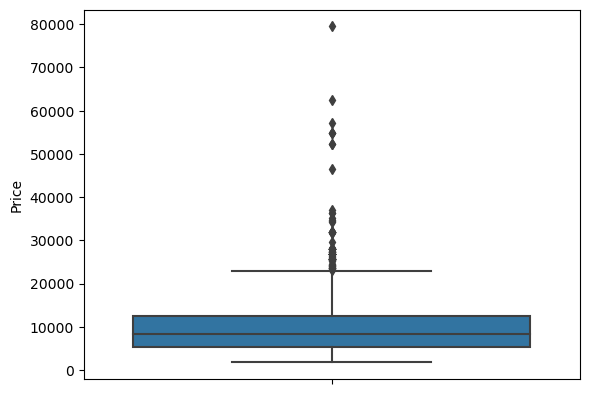

In [51]:
sns.boxplot(y='Price',data=df)

In [52]:
df['Price']=df['Price'].fillna(df['Price'].median())

In [53]:
df.describe()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
count,13352.000000,13352.000000,13352.000000,13351.000000,13352.000000,13352.000000,13352.000000,13352.0,13352.000000,13352.000000,13352.000000,13352.000000
mean,3.977531,1.485695,2.025614,1.212269,8943.455587,13.390503,4.710830,2019.0,13.395671,24.659602,12.512732,24.503445
std,2.363893,1.061274,1.311531,0.909230,4134.025060,8.439441,1.165521,0.0,6.896588,16.556800,5.736544,18.831210
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,6133.250000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000
50%,4.000000,2.000000,2.000000,2.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000
75%,4.000000,2.000000,2.000000,2.000000,11087.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000
max,11.000000,4.000000,5.000000,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000


<AxesSubplot:xlabel='Month', ylabel='Price'>

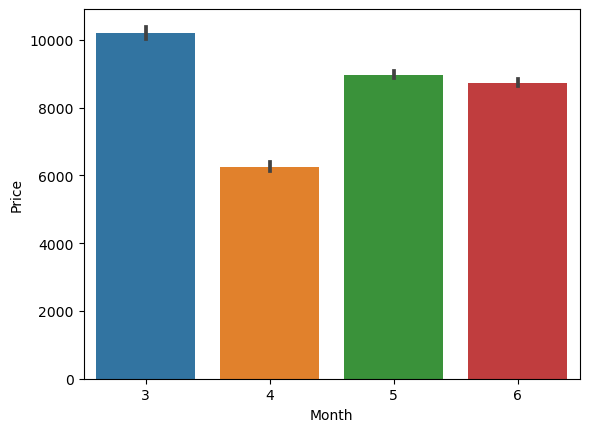

In [54]:
sns.barplot(x='Month',y='Price',data=df)

<AxesSubplot:xlabel='Arrival_hour', ylabel='Price'>

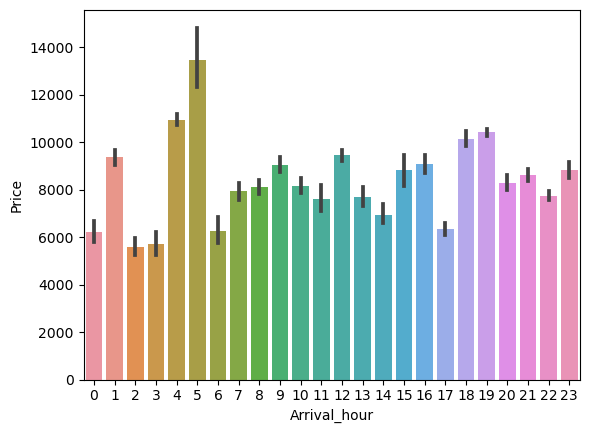

In [55]:
sns.barplot(x='Arrival_hour',y='Price',data=df)

<AxesSubplot:xlabel='Dep_hour', ylabel='Price'>

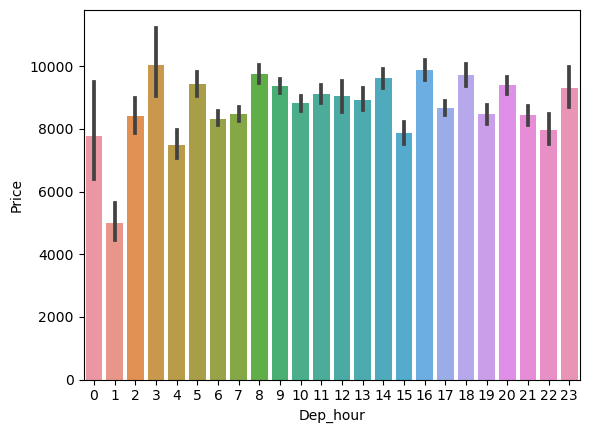

In [56]:
sns.barplot(x='Dep_hour',y='Price',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

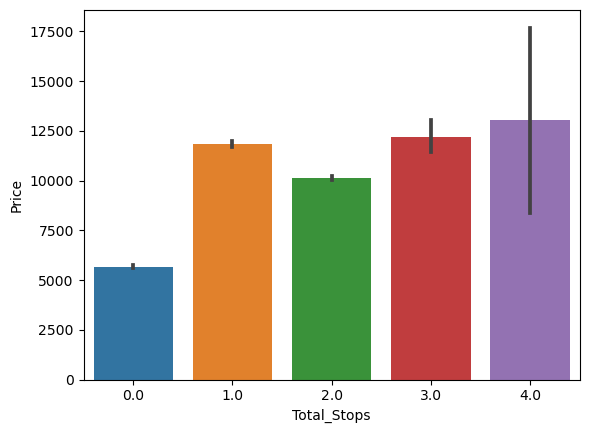

In [57]:
sns.barplot(x='Total_Stops',y='Price',data=df)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

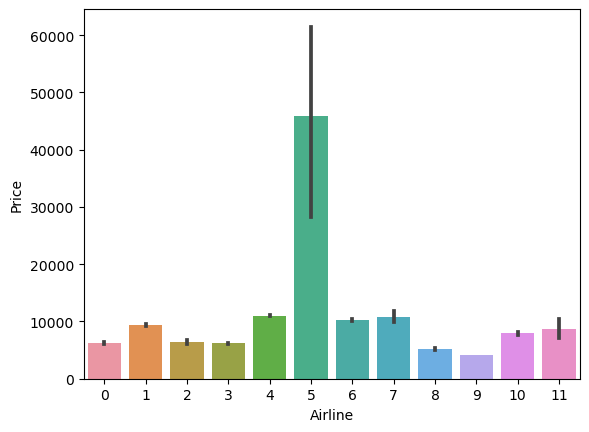

In [58]:
sns.barplot(x='Airline',y='Price',data=df)